In [2]:
from hfqco.calculator import nominal_ic, shunt_calc
print(nominal_ic(Ic=60.8*10**(-6), L=3.5*10**(-12)))


1.9175373305009014e-05


･ (Period to calculate initial phase)		=  1e-10  ~  4e-10 [s]
･ (Acceptable switch timing delay)		=  1.8e-10 [s]
･ (Interval between input SFQ or HFQ pulses)	=  5e-10 [s]
Simulate with default values.


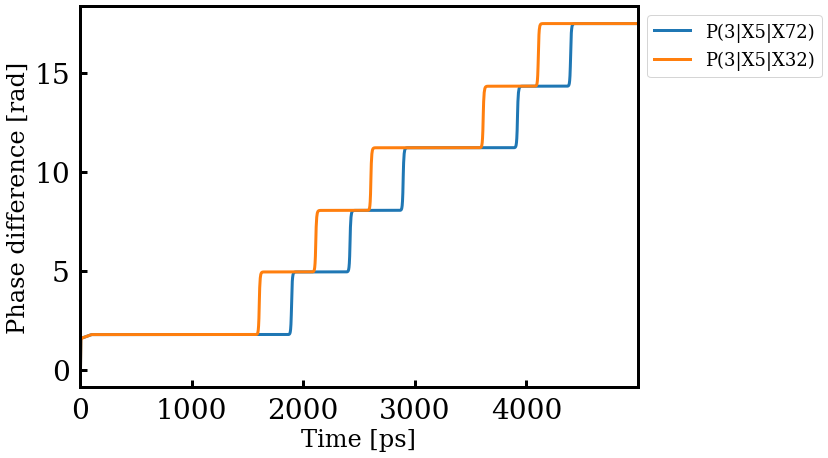

In [10]:
input = """
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

** + -------------------- +
** |     HFQJTL           |
** + -------------------- +
.subckt jtl_squid   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=0.608
R1                  1       5   20ohm 
B2                  2       5   jjmod area=0.608
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt jtl_base        1       5       100
L1                      1       2       1pH
L2                      2       3       4.2pH
L3                      3       4       8.4pH
L4                      4       5       3.2pH
X1      jtl_squid       3       0
X2      jtl_squid       4       0
R1                      2       100     34ohm
.ends

.subckt jtl_base8       1       9       100
X1      jtl_base        1       2       100
X2      jtl_base        2       3       100
X3      jtl_base        3       4       100
X4      jtl_base        4       5       100
X5      jtl_base        5       6       100
X6      jtl_base        6       7       100
X7      jtl_base        7       8       100
X8      jtl_base        8       9       100
.ends
** + ---------------------------------- +


** + -------------------- +
** |     HFQJTL           |
** + -------------------- +
.subckt jtl        1       5       100
L1                      1       2       1pH
L2                      2       3       4.2pH
L3                      3       4       8.4pH
L4                      4       5       3.2pH
X1      jtl_squid       3       0
X2      jtl_squid       4       0
R1                      2       100     34ohm
.ends

.subckt jtl8       1       9       100
X1      jtl        1       2       100
X2      jtl        2       3       100
X3      jtl        3       4       100
X4      jtl        4       5       100
X5      jtl        5       6       100
X6      jtl        6       7       100
X7      jtl        7       8       100
X8      jtl        8       9       100
.ends
** + ---------------------------------- +



*** top cell: 

Vin1                        31      0       PWL(0ps 0mV   1500ps 0mV 1501ps 0.517mV 1502ps 0.517mV 1503ps 0mV   2000ps 0mV 2001ps 0.517mV 2002ps 0.517mV 2003ps 0mV   2500ps 0mV 2501ps 0.517mV 2502ps 0.517mV 2503ps 0mV   3500ps 0mV 3501ps 0.517mV 3502ps 0.517mV 3503ps 0mV   4000ps 0mV 4001ps 0.517mV 4002ps 0.517mV 4003ps 0mV)
R31                         31      32                       1ohm
X31    jtl_base8            32      33      100
X32    jtl_base8            33      34      100
X33    jtl_base8            34      35      100
X34    jtl_base8            35      36      100


X1     JTL                  36      72      200


X71    jtl_base8            72      73      100
X72    jtl_base8            73      74      100
X73    jtl_base8            74      75      100
X74    jtl_base8            75      76      100
R72                         76      77                      8.32ohm
L71                         77      0                       2pH fcheck


Vb1                         100     0                       pwl(0ps 0mV 100ps 0.5mV)
Vb2                         200     0                       pwl(0ps 0mV 100ps #BIAS(0.5)mV)


*** jsim input file ***
.tran 1ps 5000ps 0ps 1ps

.print phase  3|X5|X72
.print phase  3|X5|X32
*.print phase  3|X5|X52

.end
"""


config_data = {
    "avgcalc.start.time":100e-12,
    "avgcalc.end.time":400e-12,
    "pulse.delay":180e-12,
    "pulse.interval": 500e-12,
    "phase.ele": ["P(3|X5|X32)","P(3|X5|X72)"],
    "voltage.ele" : [],
    "allow.multi.swithes" : False
}

from hfqco import data, util, pyjosim, netlist

from hfqco.pyjosim import simulation
from hfqco.graph import sim_plot
import importlib
importlib.reload(data)
importlib.reload(util)
importlib.reload(netlist)



# df = simulation(input)
# sim_plot(df)

# inp_df = util.create_inp_df("SHUNT",1,20,1)
d = netlist.Netlist(input, config_data)
# d.custom_simulation_async(inp_df)
# inp_df.to_csv("jtl111.csv")

# d = data.Data(netlist_and, config_data)
# d.get_base_switch_timing()
# d.get_margins()

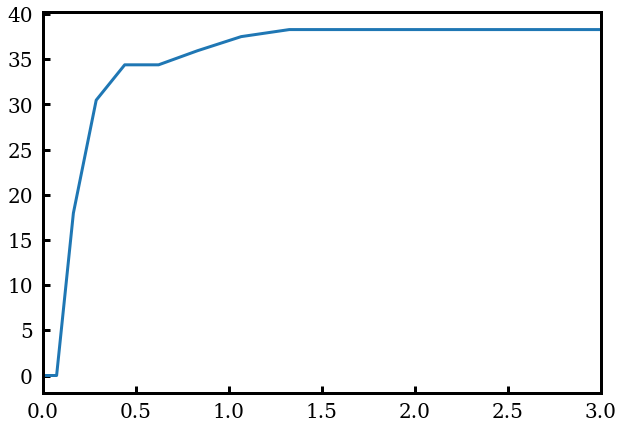

In [10]:
import pandas as pd
from hfqco.calculator import nominal_ic, betac_calc

import matplotlib.pyplot as plt
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

df0 = pd.read_csv("jtl111.csv", index_col=0)
df0["LIc"] = betac_calc(1, df0["SHUNT"])
ax1.plot(df0["LIc"], df0["min_margin"])


# df1 = pd.read_csv("dff111.csv", index_col=0)
# df1["LIc"] = betac_calc(1, df0["SHUNT"])
# ax1.plot(df1["LIc"], df1["min_margin"])

# df2 = pd.read_csv("dff111.csv", index_col=0)
# df2["LIc"] = (df2["L4"] * 0.65) / 20.7
# ax1.plot(df2["LIc"], df2["min_margin"])
# df3 = pd.read_csv("dff16.csv", index_col=0)
# df3["LIc"] = (df3["L4"] * 0.77) / 20.7
# ax1.plot(df3["LIc"], df3["min_margin"])
# df4 = pd.read_csv("dff17.csv", index_col=0)
# df4["LIc"] = (df4["L4"] * 0.82) / 20.7
# ax1.plot(df4["LIc"], df4["min_margin"])
plt.xlim(0,3)
plt.show()

･ (Period to calculate initial phase)		=  1e-10  ~  4e-10 [s]
･ (Acceptable switch timing delay)		=  1.8e-10 [s]
･ (Interval between input SFQ or HFQ pulses)	=  5e-10 [s]
[]
Simulate with default values.


[{'time': 5.83e-10, 'phase': 1, 'element': 'P(B1|X1|X5|X6+B2|X1|X5|X6)'},
 {'time': 1.0835e-09, 'phase': 2, 'element': 'P(B1|X1|X5|X6+B2|X1|X5|X6)'},
 {'time': 2.0825e-09, 'phase': 3, 'element': 'P(B1|X1|X5|X6+B2|X1|X5|X6)'},
 {'time': 2.5835e-09, 'phase': 4, 'element': 'P(B1|X1|X5|X6+B2|X1|X5|X6)'},
 {'time': 9.945e-10, 'phase': 1, 'element': 'P(B1|X1|X5|X10+B2|X1|X5|X10)'},
 {'time': 1.5185e-09, 'phase': 2, 'element': 'P(B1|X1|X5|X10+B2|X1|X5|X10)'},
 {'time': 2.4945e-09, 'phase': 3, 'element': 'P(B1|X1|X5|X10+B2|X1|X5|X10)'},
 {'time': 3.018e-09, 'phase': 4, 'element': 'P(B1|X1|X5|X10+B2|X1|X5|X10)'}]

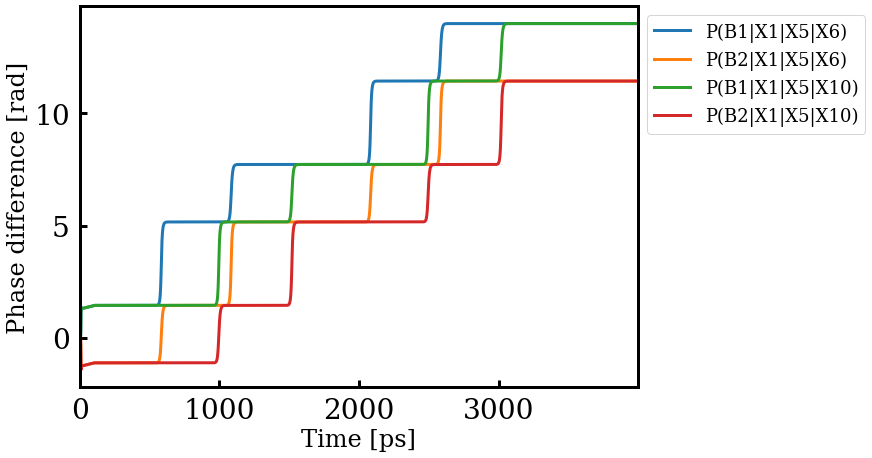

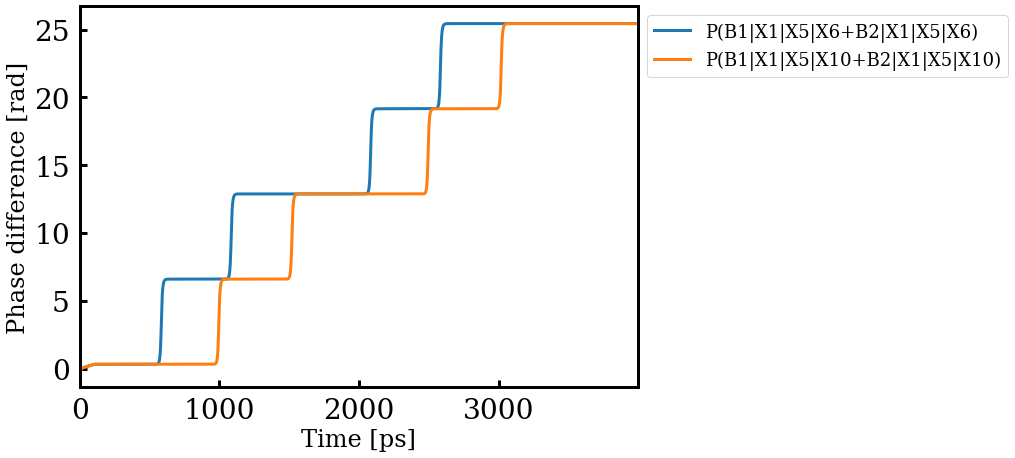

In [6]:
netlist_and = """
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model jjmod_pi jj(Rtype=1, Vg=2.8mV, Cap=0.004pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA PHI=PI)


*** ZZPSQt_jtl
.subckt ZZPSQt_jtl          1    10
***       Pin
L4                 2         10   0.200pH fcheck
L3                 6         10   0.200pH fcheck
L1                 1         4   1.550pH fcheck
L0                 5         1   1.550pH fcheck
B2                 3         6  jjmod_pi area=20
RS2                3         6  0.2ohm
B1                 4         3  jjmod area=0.608
RS1                4         3  27.56ohm *SHUNT=7.73
B0                 5         2  jjmod area=0.608
RS0                5         2  27.56ohm *SHUNT=7.73
.ends

*** HFQ_JTL2
.subckt HFQ_JTL2          1          5        13
***       Pin      Pout
X2         ZZPSQt_jtl          6     0
X1         ZZPSQt_jtl          7     0
L5                10        11   2.600pH fcheck
L4                 6         5  2.83pH fcheck
L3                 8         6   1.000pH fcheck
L2                 7         8  5.650pH fcheck
L1                10         7   1.000pH fcheck
L0                 1        10  2.83pH fcheck
R0                13        11  25.6ohm
.ends



*** ZZPSQ_AND_JTL_X1
.subckt ZZPSQ_AND_JTL_X1          1    10
***       Pin
L4                 2         10   0.200pH fcheck
L3                 6         10   0.200pH fcheck
L1                 1         4   1.550pH fcheck
L0                 5         1   1.550pH fcheck
B2                 3         6  jjmod_pi area=100
RS2                3         6  0.04ohm
B1                 4         3  jjmod area=0.608
RS1                4         3  27.56ohm *SHUNT=7.73
B0                 5         2  jjmod area=0.608
RS0                5         2  27.56ohm *SHUNT=7.73
.ends

*** ZZPSQ_AND_JTL_X2
.subckt ZZPSQ_AND_JTL_X2          1    10
***       Pin
L4                 2         10   0.200pH fcheck
L3                 6         10   0.200pH fcheck
L1                 1         4   1.550pH fcheck
L0                 5         1   1.550pH fcheck
B2                 3         6  jjmod_pi area=100
RS2                3         6  0.04ohm
B1                 4         3  jjmod area=0.608
RS1                4         3  27.56ohm *SHUNT=7.73
B0                 5         2  jjmod area=0.608
RS0                5         2  27.56ohm *SHUNT=7.73
.ends

*** AND_JTL
.subckt AND_JTL          1          5        13
***       Pin      Pout
X2         ZZPSQ_AND_JTL_X2          6     0
X1         ZZPSQ_AND_JTL_X1          7     0
L5                10        11   2.600pH fcheck
L4                 6         5  2.83pH fcheck
L3                 8         6   1.000pH fcheck
L2                 7         8  5.650pH fcheck
L1                10         7   1.000pH fcheck
L0                 1        10  2.83pH fcheck
R0                13        11  25.6ohm
.ends




*** ZZPSQ
.subckt ZZPSQ_SPL_I1          1          2
***       Pin      Pout
L4                 3         2   0.200pH fcheck
L3                 4         2   0.200pH fcheck
L1                 1         5   1.550pH fcheck
Rsq1               1         5   6.7ohm
L0                 6         1   1.550pH fcheck
Rsq0               6         1   6.7ohm
B2                 5         7  jjmod_pi area=20.00
RS2                5         7   0.20ohm 
B1                 7         4  jjmod area=0.578
*RS1                7         4  13.37ohm *SHUNT=7.73
B0                 6         3  jjmod area=0.578
*RS0                6         3  13.37ohm *SHUNT=7.73
.ends

*** ZZPSQ
.subckt ZZPSQ_SPL_I2          1          2
***       Pin      Pout
L4                 3         2   0.200pH fcheck
L3                 4         2   0.200pH fcheck
L1                 1         5   1.550pH fcheck
Rsq1               1         5   6.7ohm
L0                 6         1   1.550pH fcheck
Rsq0               6         1   6.7ohm
B2                 5         7  jjmod_pi area=20.00
RS2                5         7   0.20ohm 
B1                 7         4  jjmod area=0.578
*RS1                7         4  13.37ohm *SHUNT=7.73
B0                 6         3  jjmod area=0.578
*RS0                6         3  13.37ohm *SHUNT=7.73
.ends

*** ZZPSQ
.subckt ZZPSQ_SPL_I3          1          2
***       Pin      Pout
L4                 3         2   0.200pH fcheck
L3                 4         2   0.200pH fcheck
L1                 1         5   1.550pH fcheck
Rsq1               1         5   6.7ohm
L0                 6         1   1.550pH fcheck
Rsq0               6         1   6.7ohm
B2                 5         7  jjmod_pi area=20.00
RS2                5         7   0.20ohm 
B1                 7         4  jjmod area=0.578
*RS1                7         4  13.37ohm *SHUNT=7.73
B0                 6         3  jjmod area=0.578
*RS0                6         3  13.37ohm *SHUNT=7.73
.ends

***cell SPL
.subckt SPL           19     13     11     21
L10                8         9   2.600pH fcheck
L2                 8        10   1.000pH fcheck
L6                 3        11   2.830pH fcheck
L4                12        13   2.830pH fcheck
L15               14         3   0.001pH fcheck
L14               15        12   0.001pH fcheck
L5                10         3   4.000pH fcheck
L1                 7         8   1.000pH fcheck
L3                10        12   4.000pH fcheck
L13               16         7   0.001pH fcheck
L0                17         7   2.830pH fcheck
L16               17        18   2.600pH fcheck
Ldin              19        17   1.000pH fcheck
R2                21         9  25.00ohm
R1                21        18  25.00ohm
XI3             ZZPSQ_SPL_I3         14          0
XI2             ZZPSQ_SPL_I2         15          0
XI1             ZZPSQ_SPL_I1         16          0
*** PORT        din =         19
*** PORT      dout1 =         13
*** PORT      dout2 =         11
.ends




.subckt dcsfq13_50ohm          1          2         7
***       din      dout
R1                 7         4  16.00ohm
R2                 7         6  10.00ohm
R1i                7         8   8.32ohm
RI                 9         1  50.00ohm
B3                10        11  jjmod area=1.50
RS3               10        11   2.49ohm *SHUNT=3.73
B4                12        13  jjmod area=1.96
RS4               12        13   1.90ohm *SHUNT=3.73
B1                14        15  jjmod area=1.32
RS1               14        15   2.83ohm *SHUNT=3.73
B2                14        16  jjmod area=1.00
RS2               14        16   3.73ohm *SHUNT=3.73
B5                17        18  jjmod area=1.96
RS5               17        18   1.90ohm *SHUNT=3.73
B1i               19        20  jjmod area=2.16
RS1i              19        20   1.73ohm *SHUNT=3.73
B2i               21        22  jjmod area=2.16
RS2i              21        22   1.73ohm *SHUNT=3.73
LP3               11         0   0.195pH fcheck
L6                10        23   1.323pH fcheck
L3                24        15   1.755pH fcheck
L2                24         0   8.005pH fcheck
LP4               13         0   0.260pH fcheck
LP5               18         0   0.237pH fcheck
L1                 9        24   0.811pH fcheck
L8                12        17   2.948pH fcheck
L7                23        12   1.110pH fcheck
L9                17        25   1.609pH fcheck
L4                14        26   0.500pH fcheck
L5                26        10   3.247pH fcheck
LPR2               6        23   0.286pH fcheck
LP2               16         0   0.473pH fcheck
LPR1               4        26   0.980pH fcheck
LPIN              25        27   0.827pH fcheck
LPR1i              8        27   4.337pH fcheck
L2i               19        21   4.828pH fcheck
L3i               21         2   1.591pH fcheck
L1i               27        19   2.457pH fcheck
LP2i              22         0   0.070pH fcheck
LP1i              20         0   0.075pH fcheck
.ends

***SFQ***
.subckt jtl  3 7 1
R1                 1         2   8.32ohm
LPIN               3         4   0.840pH fcheck
LPR1               2         4   3.588pH fcheck
L2                 5         6   4.776pH fcheck
L3                 6         7   1.620pH fcheck
L1                 4         5   2.467pH fcheck
LP2                8         0   0.218pH fcheck
LP1                9         0   0.224pH fcheck
B2                 6         8  jjmod area=2.13
RS2                6         8   11.31ohm *SHUNT=11.30
B1                 5         9  jjmod area=2.13
RS1                5         9   11.31ohm *SHUNT=11.30
.ends

***SFQ***
.subckt jtl_dcr1  3 7 1
R1                 1         2   8.32ohm
LPIN               3         4   0.840pH fcheck
LPR1               2         4   3.588pH fcheck
*L2                 5         6   4.776pH fcheck
L2                 5         6   4.076pH fcheck
L3                 6         7   1.620pH fcheck
*L1                 4         5   2.467pH fcheck
L1                 4         5   2.167pH fcheck
LP2                8         0   0.218pH fcheck
LP1                9         0   0.224pH fcheck
B2                 6         8  jjmod area=1.8
RS2                6         8   5.31ohm *SHUNT=11.30
B1                 5         9  jjmod area=1.5
RS1                5         9   5.31ohm *SHUNT=11.30
.ends

***SFQ***
.subckt jtl_dcr2  3 7 1
R1                 1         2   8.32ohm
LPIN               3         4   0.840pH fcheck
LPR1               2         4   3.588pH fcheck
*L2                 5         6   4.776pH fcheck
*L2                 5         6   3.376pH fcheck
L2                 5         6   2.376pH fcheck
L3                 6         7   1.620pH fcheck
*L1                 4         5   2.467pH fcheck
L1                 4         5   1.667pH fcheck
LP2                8         0   0.218pH fcheck
LP1                9         0   0.224pH fcheck
B2                 6         8  jjmod area=1.2
RS2                6         8   5.31ohm *SHUNT=11.30
B1                 5         9  jjmod area=1.0
RS1                5         9   5.31ohm *SHUNT=11.30
.ends

.subckt DSH 1 6 100
X0 dcsfq13_50ohm 1 2 100
X1 jtl_dcr1 2 3 100
X2 jtl_dcr2 3 4 100
RStoH 4 5 3ohm
L0 5 6 3pH
.ends




*** ijtl
.subckt ijtl          1        11
***       din
L1                1         10  4.534pH
B1                10         9  jjmod area=2.13
RS1               10         9   5.31ohm *SHUNT=11.30
LP2               9         0  0.198pH
L2                10         11  1.976pH
.ends

.subckt ijtlSH 1 7 100
X0 ijtl 1 2
X1 jtl 2 3 100
X2 jtl_dcr1 3 4 100
X3 jtl_dcr2 4 5 100
RStoH 5 6 8ohm
L0 6 7 3pH
.ends






*** ZZPSQ
.subckt ZZPSQ_AND_DFF1_I2          1          2
***       Pin      Pout
L4                 3         2   0.000pH fcheck
L3                 4         2   0.000pH fcheck
L1                 1         5   #AND_DFF1_SQ2_L1(1.73)pH fcheck
Rsq1               1         5   6.7ohm
L0                 6         1   #AND_DFF1_SQ2_L0(1.52)pH fcheck
Rsq0               1         5   6.7ohm
B2                 5         7  jjmod_pi area=100.00
RS2                5         7   0.04ohm 
B1                 7         4  jjmod area=#AND_DFF1_SQ2_B(0.551)
*RS1                7         4  14.10ohm 
B0                 6         3  jjmod area=#AND_DFF1_SQ2_B(0.551)
*RS0                6         3  14.10ohm 
.ends

*** ZZPSQ
.subckt ZZPSQ_AND_DFF1_I3          1          2
***       Pin      Pout
L4                 6         2   0.200pH fcheck
L3                 7         2   0.200pH fcheck
L1                 1         5   #AND_DFF1_SQ3_L1(1.21)pH fcheck
L0                 6         1   #AND_DFF1_SQ3_L0(1.22)pH fcheck
B2                 5         7  jjmod_pi area=100.00
RS2                5         7   0.04ohm 
*B1                 7         4  jjmod area=AND_DFF1_SQ3_B(2.02)
*RS1                7         4  3.63ohm 
*B0                 6         3  jjmod area=AND_DFF1_SQ3_B(2.02)
*RS0                6         3  3.63ohm 
.ends

*** ZZPSQ
.subckt ZZPSQ_AND_DFF1_I4          1          2
***       Pin      Pout
L4                 3         2   0.000pH fcheck
L3                 4         2   0.000pH fcheck
L1                 1         5   #AND_DFF1_SQ4_L1(1.79)pH fcheck
Rsq1               1         5   6.7ohm
L0                 6         1   #AND_DFF1_SQ4_L0(1.54)pH fcheck
Rsq0               6         1   6.7ohm
B2                 5         7  jjmod_pi area=100.00
RS2                5         7   0.04ohm
B1                 7         4  jjmod area=#AND_DFF1_SQ4_B(0.547)
*RS1                7         4  12.71ohm
B0                 6         3  jjmod area=#AND_DFF1_SQ4_B(0.547)
*RS0                6         3  12.71ohm
.ends

*** ZZPSQ
.subckt ZZPSQ_AND_DFF1_I16          1          2
***       Pin      Pout
L4                 3         2   0.000pH fcheck
L3                 4         2   0.000pH fcheck
L1                 1         5   #AND_DFF1_SQ16_L1(1.83)pH fcheck
Rsq1               1         5   6.7ohm
L0                 6         1   #AND_DFF1_SQ16_L0(1.83)pH fcheck
Rsq0               6         1   6.7ohm
B2                 5         7  jjmod_pi area=100.00
RS2                5         7   0.04ohm 
B1                 7         4  jjmod area=#AND_DFF1_SQ16_B(0.615)
*RS1                7         4  14.10ohm 
B0                 6         3  jjmod area=#AND_DFF1_SQ16_B(0.615)
*RS0                6         3  14.10ohm 
.ends


***cell: AND_DFF1
.subckt AND_DFF1        10        23        16        33
*                 din       clk       dout      bias
L20               23         9   #AND_DFF1_L20_(1.15)pH fcheck
Ldin              10        11   #AND_DFF1_Lin(1.02)pH fcheck
***L17                7        12   2.600pH fcheck
L16               11        13   2.600pH fcheck
L15               14        15   2.600pH fcheck
***L10               16        17   AND_DFF1_L10(2.52)pH fcheck
***L7                 7         8   AND_DFF1_L7(2.9)pH fcheck
***L12               18         8   0.001pH fcheck
***L11               19        16   0.001pH fcheck
L14               20         4   0.001pH fcheck
L13               21        22   0.001pH fcheck
L8                 4        16   #AND_DFF1_L8(6.93)pH fcheck
***L6                23         7   AND_DFF1_L6(0.964)pH fcheck
L5                24        25   #AND_DFF1_L5(0.989)pH fcheck
L4                 3        26   #AND_DFF1_L4_(1.11)pH fcheck
L3                 3         4   #AND_DFF1_L3(1.51)pH fcheck
L2                14         3   #AND_DFF1_L2(10.3)pH fcheck
L1                22        14  #AND_DFF1_L1(18.0)pH fcheck
L0                11        22   #AND_DFF1_L0(3.39)pH fcheck
XI2            ZZPSQ_AND_DFF1_I2          9         25
XI16            ZZPSQ_AND_DFF1_I16         20          0
***XI17            ZZPSQ_AND_DFF1_I17         19          0
***XI1            ZZPSQ_AND_DFF1_I1         18          0
XI3            ZZPSQ_AND_DFF1_I3         26         24
XI4            ZZPSQ_AND_DFF1_I4         21          0
R2                33        15  #AND_DFF1_R2_(78.3)ohm
R1                33        13  #AND_DFF1_R1_(33.3)ohm
***R0                33        12  AND_DFF1_R0_(31.31)ohm
.ends




.subckt psquid30_and_cbe        3  5 
L1                 3         1   #AND_CBE_SQ30_L1(1.79)pH fcheck
L2                 3         4   #AND_CBE_SQ30_L2(1.74)pH fcheck
B1                 1         5  jjmod area=#AND_CBE_SQ30_JJ(0.627) 
R1                 1         5   #AND_CBE_SQ30_Rs(13.1)ohm 
B2                 2         5  jjmod area=#AND_CBE_SQ30_JJ(0.627)
R2                 2         5   #AND_CBE_SQ30_Rs(13.1)ohm
B3                 4         2  jjmod_pi area=100
R3                 4         2   0.04ohm
.ends

.subckt psquid31_and_cbe        3  5 
L1                 3         1   #AND_CBE_SQ31_L1(2.0)pH fcheck
L2                 3         4   #AND_CBE_SQ31_L2(1.51)pH fcheck
B1                 1         5  jjmod area=#AND_CBE_SQ31_JJ(0.654) 
*0.64beta1.73
R1                 1         5   #AND_CBE_SQ31_Rs(13.3)ohm 
*10.4
B2                 2         5  jjmod area=#AND_CBE_SQ31_JJ(0.654)
R2                 2         5   #AND_CBE_SQ31_Rs(13.3)ohm
B3                 4         2  jjmod_pi area=100
R3                 4         2   0.04ohm
.ends

.subckt psquid32_and_cbe        3  5 
L1                 3         1   #AND_CBE_SQ32_L1(1.18)pH fcheck
L2                 3         4   #AND_CBE_SQ32_L2(1.27)pH fcheck
B1                 1         5  jjmod area=#AND_CBE_SQ32_JJ(0.637) 
*0.64beta1.73
R1                 1         5   #AND_CBE_SQ32_Rs(10.8)ohm 
*10.4
B2                 2         5  jjmod area=#AND_CBE_SQ32_JJ(0.637)
R2                 2         5   #AND_CBE_SQ32_Rs(10.8)ohm
B3                 4         2  jjmod_pi area=100
R3                 4         2   0.04ohm
.ends

.subckt psquid322_and_cbe        3  5 
L1                 3         1   #AND_CBE_SQ322_L1(1.12)pH fcheck
L2                 3         4   #AND_CBE_SQ322_L2(1.11)pH fcheck
B1                 1         5  jjmod area=#AND_CBE_SQ322_JJ(2.18) 
*0.64beta1.73
R1                 1         5   #AND_CBE_SQ322_Rs(5.52)ohm 
*10.4
B2                 2         5  jjmod area=#AND_CBE_SQ322_JJ(2.18)
R2                 2         5   #AND_CBE_SQ322_Rs(5.52)ohm
B3                 4         2  jjmod_pi area=100
R3                 4         2   0.04ohm
.ends

.subckt psquid33_and_cbe        3  5 
L1                 3         1   #AND_CBE_SQ33_L1(1.76)pH fcheck
L2                 3         4   #AND_CBE_SQ33_L2(1.92)pH fcheck
B1                 1         5  jjmod area=#AND_CBE_SQ33_JJ(0.735) 
*0.64beta1.73
R1                 1         5   #AND_CBE_SQ33_Rs(13.6)ohm 
*10.4
B2                 2         5  jjmod area=#AND_CBE_SQ33_JJ(0.735)
R2                 2         5   #AND_CBE_SQ33_Rs(13.6)ohm
B3                 4         2  jjmod_pi area=100
R3                 4         2   0.04ohm
.ends

.subckt psquid34_and_cbe        3  5 
L1                 3         1   #AND_CBE_SQ34_L1(1.82)pH fcheck
L2                 3         4   #AND_CBE_SQ34_L2(1.74)pH fcheck
B1                 1         5  jjmod area=#AND_CBE_SQ34_JJ(0.564) 
*0.64beta1.73
R1                 1         5   #AND_CBE_SQ34_Rs(13.7)ohm 
*10.4
B2                 2         5  jjmod area=#AND_CBE_SQ34_JJ(0.564)
R2                 2         5   #AND_CBE_SQ34_Rs(13.7)ohm
B3                 4         2  jjmod_pi area=100
R3                 4         2   0.04ohm
.ends


.subckt AND_CBE 1 19 30 100
***L0 1 2 AND_CBE_L0(1.83)pH 
***Rb0 2 100 #AND_CBE_Rb0(34.4)ohm
***L1 2 3 AND_CBE_L1(2)pH 
***X0 psquid30_and_cbe 3 0
***L2 3 4 AND_CBE_L2(6.56)pH 
***X1 psquid31_and_cbe 4 0
***L3 4 15 AND_CBE_L3(2)pH

X2 psquid32_and_cbe 1 155
L5 155 1555 #AND_CBE_L5(1.93)pH
X22 psquid322_and_cbe 1555 16

L6 16 17 #AND_CBE_L6(2.0)pH
Rb1 17 100 #AND_CBE_Rb1(57.1)ohm
L7 17 18 #AND_CBE_L7(0.507)pH


***L8 19 20 AND_CBE_L8(1.83)pH 
***Rb2 20 100 AND_CBE_Rb2(34.1)ohm
***L9 20 21 AND_CBE_L9(2)pH 
***X3 psquid30_and_cbe 21 0
***L10 21 22 AND_CBE_L10(6.56)pH 
***X4 psquid31_and_cbe 22 0
***L11 22 23 AND_CBE_L11(2)pH

X5 psquid32_and_cbe 19 244
L12 244 2444 #AND_CBE_L12_(1.96)pH
X55 psquid322_and_cbe 2444 24

L13 24 25 #AND_CBE_L13(2.11)pH
Rb3 25 100 #AND_CBE_Rb3(51.6)ohm
L14 25 18 #AND_CBE_L14(0.459)pH


L15 18 26 #AND_CBE_L15(2.49)pH
X6 psquid33_and_cbe 26 0
L16 26 27 #AND_CBE_L16(4.71)pH
Rb4 27 100 #AND_CBE_Rb4(42.6)ohm
L17 27 29 #AND_CBE_L17(4.34)pH
X7 psquid34_and_cbe 29 0
L19 29 30 #AND_CBE_L16(4.71)pH
*13.3pH
.ends



***topcell
X1 ijtlSH 1 4 200
X2 HFQ_JTL2 4 5 300
X3 HFQ_JTL2 5 6 300
X4 HFQ_JTL2 6 7 300

X6 ijtlSH 2 8 200
X7 HFQ_JTL2 8 9 300
X8 HFQ_JTL2 9 10 300
X9 HFQ_JTL2 10 11 300

X10 ijtlSH 3 12 200
X11 HFQ_JTL2 12 13 300
X12 HFQ_JTL2 13 14 300
X13 HFQ_JTL2 14 15 300

***Xspl  SPL 11 16 17 100
Xand_jtl AND_JTL 11 16 100
Xdff1 AND_DFF1 7 16 19 100
Xdff2 AND_DFF1 15 16 20 100
Xcb   AND_CBE 19 20 21 100


X18 HFQ_JTL2 21 24 300
X19 HFQ_JTL2 24 25 300
X20 HFQ_JTL2 25 26 300
Lend1 26 32 3pH
Rend1 32 0 3ohm
*** jsim input file ***
.tran 1ps 4000ps 0ps 1ps

.print phase  B1|X1|X5|X6
.print phase  B1|X1|X5|X10

.end
"""


config_data = {
    "avgcalc.start.time":100e-12,
    "avgcalc.end.time":400e-12,
    "pulse.delay":180e-12,
    "pulse.interval": 500e-12,
    "phase.ele": [["B1|X1|X5|X6","B2|X1|X5|X6"],["B1|X1|X5|X10","B2|X1|X5|X10"]],
    "voltage.ele" : [],
    "allow.multi.swithes" : False
}

from hfqco import data, util, pyjosim
from hfqco.pyjosim import simulation
from hfqco.graph import sim_plot
import importlib
importlib.reload(data)
importlib.reload(util)



# df = simulation(netlist_jtl)
# sim_plot(df)

# inp_df = util.create_inp_df("BIAS_R",20,50,1)
# d = data.Data(netlist_and, config_data)
# d.get_base_switch_timing()
# d.custom_simulation_async(inp_df)
# inp_df.to_csv("jtl6.csv")

d = data.Data(netlist_and, config_data)
# d.data_simulation()
d.get_base_switch_timing()
# d.get_margins()